#Importing Libraries

In [102]:
import tensorflow
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#Using Keras to load dataset

In [103]:
fashion = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion.load_data()

In [104]:
print(fashion)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


In [105]:
x_train_full.shape

(60000, 28, 28)

In [106]:
x_train_full.dtype

dtype('uint8')

In [107]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [108]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle boot"]

In [109]:
class_names[y_train[0]]

'Coat'

#Creating the model using sequential API

##Method 1 to create a DNN

In [110]:
model = kerasdels.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')).mo

##Method 2 to create a DNN (Preferred)

In [111]:
# 300,100 and 10 respectively refers to the number of neurons

model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28,28]),
                                 keras.layers.Dense(300,activation='relu'),
                                 keras.layers.Dense(100,activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')
])

In [112]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.layers

In [114]:
hidden1 = model.layers[1]
hidden1.name

'dense_24'

In [116]:
model.get_layer('dense_24') is hidden1

True

In [117]:
weight,biases = hidden1.get_weights()

In [118]:
weight

array([[ 0.04183425, -0.05762828,  0.06243998, ..., -0.0436357 ,
        -0.03466757, -0.07367244],
       [-0.04704772,  0.02195872,  0.03677487, ...,  0.02659374,
         0.03930063, -0.03461835],
       [-0.00378959, -0.04905412, -0.02612587, ..., -0.00920852,
         0.0618716 , -0.0112077 ],
       ...,
       [-0.04877603,  0.00231993,  0.01307829, ..., -0.06720316,
        -0.06091951, -0.00568943],
       [ 0.03398062, -0.02623595, -0.04888049, ...,  0.06962925,
         0.04871593, -0.02744608],
       [ 0.02291713, -0.05133627,  0.04568712, ...,  0.00516842,
         0.05695343, -0.04941227]], dtype=float32)

In [119]:
weight.shape

(784, 300)

In [120]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [121]:
biases.shape

(300,)

#Compiling thee model

In [122]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"]
)

#Training and Evaluating the model

In [123]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7189 - accuracy: 0.7675 - val_loss: 0.5007 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4869 - accuracy: 0.8301 - val_loss: 0.4583 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4423 - accuracy: 0.8440 - val_loss: 0.4265 - val_accuracy: 0.8492
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4153 - accuracy: 0.8530 - val_loss: 0.3962 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3944 - accuracy: 0.8611 - val_loss: 0.3770 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3785 - accuracy: 0.8660 - val_loss: 0.3843 - val_accuracy: 0.8614
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3659 - accuracy: 0.8708 - val_loss: 0.3794 - val_accuracy:

<function matplotlib.pyplot.show>

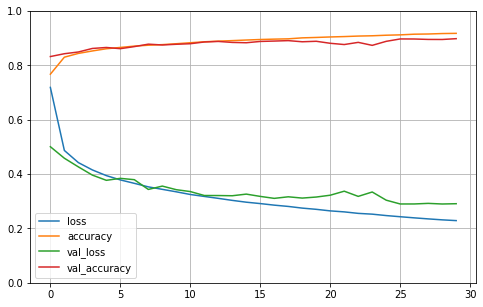

In [124]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [125]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 65.0001 - accuracy: 0.8443


[65.0000991821289, 0.8442999720573425]

#Using the model to make predictions

In [137]:
x_new = x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [146]:
x_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [156]:
# y_pred = (model.predict(x_new) > 0.5).astype("int32")
y_pred=model.predict(x_new)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1])

In [157]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [158]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [159]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [160]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')